In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
warnings.filterwarnings("ignore")

### Read CSV of Application Record & Credit Record

In [2]:
application = pd.read_csv('application_record.csv')
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
credit = pd.read_csv('credit_record.csv')
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

#### Find unique IDs that intersect with credit record

In [5]:
print(f"Unique ID in application record: {len(application.ID.unique())}")
print(f"Unique ID in credit record: {len(credit.ID.unique())}")
print(f"IDs that intersect: {len(set(application['ID']).intersection(set(credit['ID'])))}") 

Unique ID in application record: 438510
Unique ID in credit record: 45985
IDs that intersect: 36457


#### Group data by ID

In [6]:
grouped = credit.groupby('ID')
grouped.first()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001712,0,C
5001713,0,X
5001714,0,X
5001715,0,X
...,...,...
5150482,-11,C
5150483,0,X
5150484,0,C


#### Create pivot table of credit record with **'MONTHS_BALANCE'** as features

In [7]:
pivot_tb = credit.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')
pivot_tb

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,C,C,C,C,C,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,C


#### Calculate observe window

In [8]:
pivot_tb['OPEN_MONTH'] = grouped['MONTHS_BALANCE'].min() # smallest value of MONTHS_BALANCE, month when loan was granted
pivot_tb['END_MONTH'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, canceling of account

In [9]:
pivot_tb

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,OPEN_MONTH,END_MONTH
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X,-3,0
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,C,C,C,C,C,C,C,C,C,-18,0
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,-21,0
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,-14,0
5001715,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,-59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,C,C,C,C,C,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28,-11
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,-17,0
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,C,-12,0


In [10]:
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'OPEN_MONTH', 'END_MONTH']]
pivot_tb['WINDOW'] = pivot_tb['END_MONTH'] - pivot_tb['OPEN_MONTH']
pivot_tb

MONTHS_BALANCE,ID,OPEN_MONTH,END_MONTH,WINDOW
ID,,,,
5001711,5001711,-3,0,3
5001712,5001712,-18,0,18
5001713,5001713,-21,0,21
5001714,5001714,-14,0,14
5001715,5001715,-59,0,59
...,...,...,...,...
5150482,5150482,-28,-11,17
5150483,5150483,-17,0,17
5150484,5150484,-12,0,12


In [11]:
pivot_tb.reset_index(drop=True, inplace=True)
pivot_tb

MONTHS_BALANCE,ID,OPEN_MONTH,END_MONTH,WINDOW
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


#### Merge initial credit record with the observe window

In [12]:
credit = pd.merge(credit, pivot_tb, on='ID', how='left')
credit0 = credit.copy()
credit 

,ID,MONTHS_BALANCE,STATUS,OPEN_MONTH,END_MONTH,WINDOW
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18
...,...,...,...,...,...,...
1048570,5150487,-25,C,-29,0,29
1048571,5150487,-26,C,-29,0,29
1048572,5150487,-27,C,-29,0,29
1048573,5150487,-28,C,-29,0,29


In [13]:
credit_copy = credit.copy()
credit = credit[credit['WINDOW'] >= 12]

### Status Description in Credit Record

* 0: 1-29 days past due
* 1: 30-59 days past due
* 2: 60-89 days past due
* 3: 90-119 days past due
* 4: 120-149 days past due
* 5: >150 days past due
* C: Paid off that moonth
* X: No loan that month

In [14]:
# Map status where < 60 days past due, paid off, or no loan is 0, else is 1

credit['status'] = np.where((credit['STATUS'] == '2') | 
                            (credit['STATUS'] == '3' )| 
                            (credit['STATUS'] == '4' )| 
                            (credit['STATUS'] == '5'), 1, 0) 
credit

,ID,MONTHS_BALANCE,STATUS,OPEN_MONTH,END_MONTH,WINDOW,status
4,5001712,0,C,-18,0,18,0
5,5001712,-1,C,-18,0,18,0
6,5001712,-2,C,-18,0,18,0
7,5001712,-3,C,-18,0,18,0
8,5001712,-4,C,-18,0,18,0
...,...,...,...,...,...,...,...
1048570,5150487,-25,C,-29,0,29,0
1048571,5150487,-26,C,-29,0,29,0
1048572,5150487,-27,C,-29,0,29,0
1048573,5150487,-28,C,-29,0,29,0


In [15]:
credit['status'] = credit['status'].astype(np.int8)
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943061 entries, 4 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              943061 non-null  int64 
 1   MONTHS_BALANCE  943061 non-null  int64 
 2   STATUS          943061 non-null  object
 3   OPEN_MONTH      943061 non-null  int64 
 4   END_MONTH       943061 non-null  int64 
 5   WINDOW          943061 non-null  int64 
 6   status          943061 non-null  int8  
dtypes: int64(5), int8(1), object(1)
memory usage: 51.3+ MB


In [16]:
#  How many months after opening book
credit['MONTH_ON_BOOK'] = credit['MONTHS_BALANCE'] - credit['OPEN_MONTH'] 
credit.sort_values(by=['ID','MONTH_ON_BOOK'], inplace = True)
credit

,ID,MONTHS_BALANCE,STATUS,OPEN_MONTH,END_MONTH,WINDOW,status,MONTH_ON_BOOK
22,5001712,-18,0,-18,0,18,0,0
21,5001712,-17,0,-18,0,18,0,1
20,5001712,-16,0,-18,0,18,0,2
19,5001712,-15,0,-18,0,18,0,3
18,5001712,-14,0,-18,0,18,0,4
...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25
1048548,5150487,-3,C,-29,0,29,0,26
1048547,5150487,-2,C,-29,0,29,0,27
1048546,5150487,-1,C,-29,0,29,0,28


In [17]:
# Count how many account is opened every month
denominator = pivot_tb.groupby(['OPEN_MONTH']).aggregate({'ID': ['count']}) 
denominator.reset_index(inplace = True)
denominator.columns = ['OPEN_MONTH','STA_SUM']
denominator[:20]

,OPEN_MONTH,STA_SUM
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
5,-55,486
6,-54,468
7,-53,493
8,-52,553
9,-51,582


In [18]:
vintage = credit.groupby(['OPEN_MONTH','MONTH_ON_BOOK']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['OPEN_MONTH', 'MONTH_ON_BOOK', 'STA_SUM']
vintage['DUE_COUNT'] = np.nan
vintage = vintage[['OPEN_MONTH','MONTH_ON_BOOK','DUE_COUNT']] 
vintage[:20]

,OPEN_MONTH,MONTH_ON_BOOK,DUE_COUNT
0,-60,0,NaN
1,-60,1,NaN
2,-60,2,NaN
3,-60,3,NaN
4,-60,4,NaN
5,-60,5,NaN
6,-60,6,NaN
7,-60,7,NaN
8,-60,8,NaN
9,-60,9,NaN


In [19]:
# Delete aggregate column & join sta_sum column to vintage table
vintage = pd.merge(vintage, denominator, on=['OPEN_MONTH'], how='left') 
vintage

,OPEN_MONTH,MONTH_ON_BOOK,DUE_COUNT,STA_SUM
0,-60,0,NaN,415
1,-60,1,NaN,415
2,-60,2,NaN,415
3,-60,3,NaN,415
4,-60,4,NaN,415
...,...,...,...,...
1808,-12,8,NaN,985
1809,-12,9,NaN,985
1810,-12,10,NaN,985
1811,-12,11,NaN,985


In [20]:
for j in range(-60, 1): # open month (month account was opened)
    ls = []
    for i in range(0, 61): # month on book (time after the credit card was granted)
        due = list(credit[(credit['status'] == 1) & (credit['MONTH_ON_BOOK'] == i) & (credit['OPEN_MONTH'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['MONTH_ON_BOOK'] == i) & (vintage['OPEN_MONTH'] == j), 'DUE_COUNT'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
        
vintage['STA_RATE']  = vintage['DUE_COUNT'] / vintage['STA_SUM'] # calculate cumulative % of bad customers
vintage    

,OPEN_MONTH,MONTH_ON_BOOK,DUE_COUNT,STA_SUM,STA_RATE
0,-60,0,0.0,415,0.000000
1,-60,1,0.0,415,0.000000
2,-60,2,0.0,415,0.000000
3,-60,3,0.0,415,0.000000
4,-60,4,0.0,415,0.000000
...,...,...,...,...,...
1808,-12,8,8.0,985,0.008122
1809,-12,9,8.0,985,0.008122
1810,-12,10,8.0,985,0.008122
1811,-12,11,8.0,985,0.008122


In [21]:
vintage_wide = vintage.pivot(index='OPEN_MONTH',
                             columns='MONTH_ON_BOOK',
                             values='STA_RATE')
vintage_wide

MONTH_ON_BOOK,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
OPEN_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.00000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.00000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.00000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.00000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
-55,0.00000,0.000000,0.004115,0.008230,0.014403,0.018519,0.024691,0.024691,0.024691,0.026749,0.026749,0.026749,0.028807,0.034979,0.037037,0.039095,0.041152,0.041152,0.041152,0.041152,0.041152,0.041152,0.041152,0.041152,0.041152,0.041152,0.043210,0.043210,0.043210,0.043210,0.043210,0.043210,0.043210,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,0.047325,NaN,NaN,NaN,NaN,NaN
-54,0.00000,0.000000,0.000000,0.002137,0.004274,0.004274,0.006410,0.012821,0.012821,0.017094,0.019231,0.019231,0.023504,0.027778,0.027778,0.029915,0.029915,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,NaN,Na

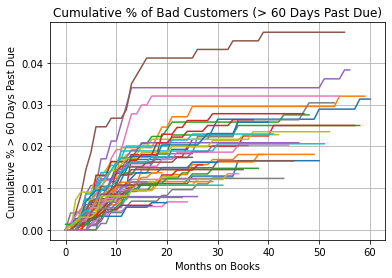

In [22]:
# Plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

### Observe Window Analysis

Amount of accounts with certain observe windows.

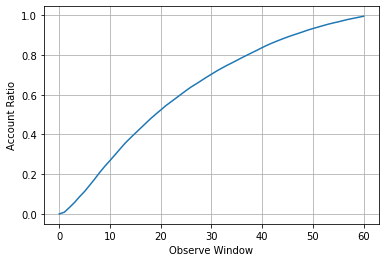

In [23]:
lst = []
for i in range(0,61):
    ratio = len(pivot_tb[pivot_tb['WINDOW'] < i]) / len(set(pivot_tb['ID']))
    lst.append(ratio)
    
pd.Series(lst).plot(grid=True)
plt.xlabel('Observe Window')
plt.ylabel('Account Ratio')
plt.show()

In [24]:
credit

,ID,MONTHS_BALANCE,STATUS,OPEN_MONTH,END_MONTH,WINDOW,status,MONTH_ON_BOOK
22,5001712,-18,0,-18,0,18,0,0
21,5001712,-17,0,-18,0,18,0,1
20,5001712,-16,0,-18,0,18,0,2
19,5001712,-15,0,-18,0,18,0,3
18,5001712,-14,0,-18,0,18,0,4
...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25
1048548,5150487,-3,C,-29,0,29,0,26
1048547,5150487,-2,C,-29,0,29,0,27
1048546,5150487,-1,C,-29,0,29,0,28


In [25]:
def calculate_observe(credit, command):
    '''calculate observe window
    '''
    id_sum = len(set(pivot_tb['ID']))
    credit['status'] = 0
    exec(command)
    credit['MONTH_ON_BOOK'] = credit['MONTHS_BALANCE'] - credit['OPEN_MONTH']
    minagg = credit[credit['status'] == 1].groupby('ID')['MONTH_ON_BOOK'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    obslst = pd.DataFrame({'MONTH_ON_BOOK':range(0,61), 'rate': None})
    lst = []
    for i in range(0,61):
        due = list(minagg[minagg['MONTH_ON_BOOK']  == i]['ID'])
        lst.extend(due)
        obslst.loc[obslst['MONTH_ON_BOOK'] == i, 'rate'] = len(set(lst)) / id_sum 
    return obslst['rate']

command = "credit.loc[(credit['STATUS'] == '0') | (credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(credit, command)

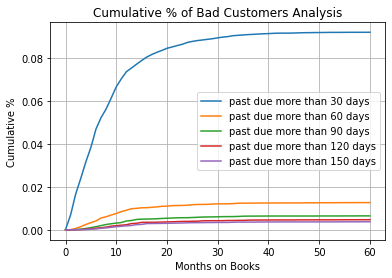

In [26]:
obslst = pd.DataFrame({'past due more than 30 days': morethan30,
                       'past due more than 60 days': morethan60,
                       'past due more than 90 days': morethan90,
                       'past due more than 120 days': morethan120,
                       'past due more than 150 days': morethan150
                        })

obslst.plot(grid = True, title = 'Cumulative % of Bad Customers Analysis')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative %')
plt.show()

In [27]:
def calculate_rate(pivot_tb, command): 
    '''calculate bad customer rate
    '''
    credit0['status'] = None
    exec(command) # excuate input code
    sumagg = credit0.groupby('ID')['status'].agg(sum)
    pivot_tb = pd.merge(pivot_tb, sumagg, on = 'ID', how = 'left')
    pivot_tb.loc[pivot_tb['status'] > 1, 'status'] = 1
    rate = pivot_tb['status'].sum() / len(pivot_tb)
    return round(rate, 5)

command = "credit0.loc[(credit0['STATUS'] == '0') | (credit0['STATUS'] == '1') | (credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '1') | (credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_rate(pivot_tb, command)

summary_dt = pd.DataFrame({'situation':['past due more than 1 day',
                               'past due more than 30 days',
                               'past due more than 60 days',
                               'past due more than 90 days',
                               'past due more than 120 days',
                               'past due more than 150 days'],
                      'bad customer ratio':[morethan1,
                               morethan30,
                               morethan60,
                               morethan90, 
                               morethan120,
                               morethan150, 
                      ]})
summary_dt

,situation,bad customer ratio
0,past due more than 1 day,0.87054
1,past due more than 30 days,0.11634
2,past due more than 60 days,0.01450
3,past due more than 90 days,0.00720
4,past due more than 120 days,0.00528
5,past due more than 150 days,0.00424


In [28]:
credit

,ID,MONTHS_BALANCE,STATUS,OPEN_MONTH,END_MONTH,WINDOW,status,MONTH_ON_BOOK
22,5001712,-18,0,-18,0,18,0,0
21,5001712,-17,0,-18,0,18,0,1
20,5001712,-16,0,-18,0,18,0,2
19,5001712,-15,0,-18,0,18,0,3
18,5001712,-14,0,-18,0,18,0,4
...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25
1048548,5150487,-3,C,-29,0,29,0,26
1048547,5150487,-2,C,-29,0,29,0,27
1048546,5150487,-1,C,-29,0,29,0,28


* 0: 1-29 days past due
* 1: 30-59 days past due
* 2: 60-89 days past due
* 3: 90-119 days past due
* 4: 120-149 days past due
* 5: >150 days past due
* C: Paid off that month
* X: No loan that month

In [29]:
credit['REP'] = 0
good = ['C', 'X']
bad = ['2', '3', '4', '5']
neut = ['0', '1']

# if STATUS is C, X, rep = 1
# if STATUS is 2, 3, 4, 5, rep = -1
# if STATUS is 0, 1 interchangable

credit.loc[(credit.STATUS == 'C'), 'REP'] = 1
credit.loc[(credit.STATUS == 'X'), 'REP'] = 1
credit.loc[(credit.STATUS == '0'), 'REP'] = 1
credit.loc[(credit.STATUS =='1'), 'REP'] = 1
credit.loc[(credit.STATUS =='2'), 'REP'] = -1
credit.loc[(credit.STATUS =='3'), 'REP'] = -1
credit.loc[(credit.STATUS =='4'), 'REP'] = -1
credit.loc[(credit.STATUS =='5'), 'REP'] = -1

credit

,ID,MONTHS_BALANCE,STATUS,OPEN_MONTH,END_MONTH,WINDOW,status,MONTH_ON_BOOK,REP
22,5001712,-18,0,-18,0,18,0,0,0
21,5001712,-17,0,-18,0,18,0,1,0
20,5001712,-16,0,-18,0,18,0,2,0
19,5001712,-15,0,-18,0,18,0,3,0
18,5001712,-14,0,-18,0,18,0,4,0
...,...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25,2
1048548,5150487,-3,C,-29,0,29,0,26,2
1048547,5150487,-2,C,-29,0,29,0,27,2
1048546,5150487,-1,C,-29,0,29,0,28,2


In [30]:
id_rep = pd.DataFrame(credit.groupby('ID')['REP'].sum())
len(id_rep)

30918

In [31]:
positive = sum(id_rep[id_rep['REP'] >= 0].value_counts())
negative = sum(id_rep[id_rep['REP'] < 0].value_counts())

print(f"Positive = {positive}")
print(f"Negative = {negative}")

Positive = 30040
Negative = 878


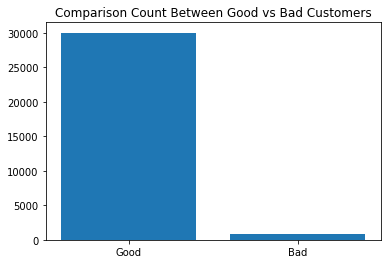

In [32]:
plt.bar(x=['Good', 'Bad'], height=[positive, negative])
plt.title('Comparison Count Between Good vs Bad Customers')
plt.show()

In [33]:
application = pd.merge(application, id_rep, on="ID")
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REP
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,26
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,24
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,30
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,36
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,60


In [34]:
application.loc[application.REP >= 0, 'REP'] = 1
application.loc[application.REP < 0, 'REP'] = 0

application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REP
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1


In [35]:
application['OCCUPATION_TYPE'] = application['OCCUPATION_TYPE'].fillna('Unknown')
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REP
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,Unknown,2.0,1
23415,5149775,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,1
23416,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0
23417,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

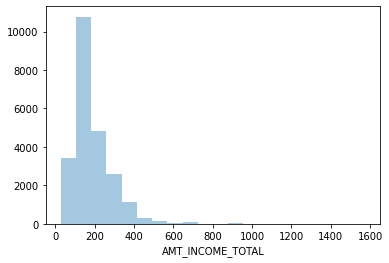

In [36]:
# Plot income (1000K)

sns.distplot(application['AMT_INCOME_TOTAL']/1000, bins=20, kde=False)

In [37]:
# application = application[application.AMT_INCOME_TOTAL <= 500000]
# application

In [38]:
import datetime
from datetime import timedelta

application['BIRTH_DATE'] = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") + application['DAYS_BIRTH'].apply(pd.offsets.Day)
application = application.drop(['DAYS_BIRTH'], axis=1)
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REP,BIRTH_DATE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,Unknown,2.0,1,1987-02-18
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,Unknown,2.0,1,1987-02-18
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2.0,1,1961-03-17
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,1,1967-09-06
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,1,1967-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,1,0,0,0,Unknown,2.0,1,1967-09-15
23415,5149775,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-9391,1,0,1,0,Laborers,2.0,1,1975-10-27
23416,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-1325,1,0,1,1,Medicine staff,2.0,0,1986-02-01
23417,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,1,0,1,1,Medicine staff,2.0,0,1986-02-01


In [39]:
# DAYS_EMPLOYED: Count backwards from current day(0). If positive, it means the person currently unemployed.
# Update DAYS_EMPLOYED greater than 0 to 31
application.loc[application.DAYS_EMPLOYED >0, "DAYS_EMPLOYED"] = 31
application['EMPLOYMENT_START_DATE'] = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") + application['DAYS_EMPLOYED'].apply(pd.offsets.Day)
application = application.drop(['DAYS_EMPLOYED'], axis=1)
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REP,BIRTH_DATE,EMPLOYMENT_START_DATE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,1,1987-02-18,2007-07-26
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,1,1987-02-18,2007-07-26
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,1,1961-03-17,2016-11-23
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,1,1967-09-06,2011-08-25
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,1,1967-09-06,2011-08-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Unknown,2.0,1,1967-09-15,2015-04-16
23415,5149775,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Laborers,2.0,1,1975-10-27,1994-04-16
23416,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,0,1986-02-01,2016-05-16
23417,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,0,1986-02-01,2016-05-16


In [40]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23419 entries, 0 to 23418
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     23419 non-null  int64         
 1   CODE_GENDER            23419 non-null  object        
 2   FLAG_OWN_CAR           23419 non-null  object        
 3   FLAG_OWN_REALTY        23419 non-null  object        
 4   CNT_CHILDREN           23419 non-null  int64         
 5   AMT_INCOME_TOTAL       23419 non-null  float64       
 6   NAME_INCOME_TYPE       23419 non-null  object        
 7   NAME_EDUCATION_TYPE    23419 non-null  object        
 8   NAME_FAMILY_STATUS     23419 non-null  object        
 9   NAME_HOUSING_TYPE      23419 non-null  object        
 10  FLAG_MOBIL             23419 non-null  int64         
 11  FLAG_WORK_PHONE        23419 non-null  int64         
 12  FLAG_PHONE             23419 non-null  int64         
 13  F

In [41]:
dict_gender = {
    'F' : 0,
    'M' : 1
}

application['CODE_GENDER'] = application['CODE_GENDER'].map(dict_gender)

In [42]:
dict_flag = {
    'Y' : 0,
    'N' : 1
}

application['FLAG_OWN_REALTY'] = application['FLAG_OWN_REALTY'].map(dict_flag)
application['FLAG_OWN_CAR'] = application['FLAG_OWN_CAR'].map(dict_flag)

In [43]:
unique_list = application['NAME_INCOME_TYPE'].unique()
dict_type = dict(zip(unique_list, range(len(unique_list))))

application['NAME_INCOME_TYPE'] = application['NAME_INCOME_TYPE'].map(dict_type)

In [44]:
unique_list = application['NAME_EDUCATION_TYPE'].unique()
dict_type = dict(zip(unique_list, range(len(unique_list))))

application['NAME_EDUCATION_TYPE'] = application['NAME_EDUCATION_TYPE'].map(dict_type)       

In [45]:
unique_list = application['NAME_FAMILY_STATUS'].unique()
dict_type = dict(zip(unique_list, range(len(unique_list))))

application['NAME_FAMILY_STATUS'] = application['NAME_FAMILY_STATUS'].map(dict_type)            
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REP,BIRTH_DATE,EMPLOYMENT_START_DATE
0,5008804,1,0,0,0,427500.0,0,0,0,Rented apartment,1,1,0,0,Unknown,2.0,1,1987-02-18,2007-07-26
1,5008805,1,0,0,0,427500.0,0,0,0,Rented apartment,1,1,0,0,Unknown,2.0,1,1987-02-18,2007-07-26
2,5008806,1,0,0,0,112500.0,0,1,1,House / apartment,1,0,0,0,Security staff,2.0,1,1961-03-17,2016-11-23
3,5008810,0,1,0,0,270000.0,1,1,2,House / apartment,1,0,1,1,Sales staff,1.0,1,1967-09-06,2011-08-25
4,5008811,0,1,0,0,270000.0,1,1,2,House / apartment,1,0,1,1,Sales staff,1.0,1,1967-09-06,2011-08-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,1,0,0,0,90000.0,0,1,1,House / apartment,1,0,0,0,Unknown,2.0,1,1967-09-15,2015-04-16
23415,5149775,0,0,0,0,130500.0,0,1,1,House / apartment,1,0,1,0,Laborers,2.0,1,1975-10-27,1994-04-16
23416,5149834,0,1,0,0,157500.0,1,0,1,House / apartment,1,0,1,1,Medicine staff,2.0,0,1986-02-01,2016-05-16
23417,5149838,0,1,0,0,157500.0,2,0,1,House / apartment,1,0,1,1,Medicine staff,2.0,0,1986-02-01,2016-05-16


In [46]:
unique_list = application['NAME_HOUSING_TYPE'].unique()
dict_type = dict(zip(unique_list, range(len(unique_list))))

application['NAME_HOUSING_TYPE'] = application['NAME_HOUSING_TYPE'].map(dict_type)            

In [47]:
unique_list = application['OCCUPATION_TYPE'].unique()
dict_type = dict(zip(unique_list, range(len(unique_list))))

application['OCCUPATION_TYPE'] = application['OCCUPATION_TYPE'].map(dict_type) 

In [48]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23419 entries, 0 to 23418
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     23419 non-null  int64         
 1   CODE_GENDER            23419 non-null  int64         
 2   FLAG_OWN_CAR           23419 non-null  int64         
 3   FLAG_OWN_REALTY        23419 non-null  int64         
 4   CNT_CHILDREN           23419 non-null  int64         
 5   AMT_INCOME_TOTAL       23419 non-null  float64       
 6   NAME_INCOME_TYPE       23419 non-null  int64         
 7   NAME_EDUCATION_TYPE    23419 non-null  int64         
 8   NAME_FAMILY_STATUS     23419 non-null  int64         
 9   NAME_HOUSING_TYPE      23419 non-null  int64         
 10  FLAG_MOBIL             23419 non-null  int64         
 11  FLAG_WORK_PHONE        23419 non-null  int64         
 12  FLAG_PHONE             23419 non-null  int64         
 13  F

In [49]:
open_month = credit.drop(['STATUS', 'OPEN_MONTH', 'END_MONTH', 'status', 'MONTH_ON_BOOK', 'REP', 'MONTHS_BALANCE'], axis=1)

In [50]:
open_month['ACCOUNT_OPEN']= datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
open_month['ACCOUNT_OPEN']= open_month['ACCOUNT_OPEN'] - open_month['WINDOW'].values.astype("timedelta64[M]")
open_month['ACCOUNT_OPEN']= open_month['ACCOUNT_OPEN'].dt.strftime('%b-%Y')
open_month = open_month.drop(['WINDOW'], axis=1)

In [51]:
open_month = open_month.drop_duplicates()

In [52]:
application = pd.merge(application, open_month, on="ID")
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REP,BIRTH_DATE,EMPLOYMENT_START_DATE,ACCOUNT_OPEN
0,5008804,1,0,0,0,427500.0,0,0,0,0,1,1,0,0,0,2.0,1,1987-02-18,2007-07-26,Oct-2018
1,5008805,1,0,0,0,427500.0,0,0,0,0,1,1,0,0,0,2.0,1,1987-02-18,2007-07-26,Nov-2018
2,5008806,1,0,0,0,112500.0,0,1,1,1,1,0,0,0,1,2.0,1,1961-03-17,2016-11-23,Aug-2017
3,5008810,0,1,0,0,270000.0,1,1,2,1,1,0,1,1,2,1.0,1,1967-09-06,2011-08-25,Nov-2017
4,5008811,0,1,0,0,270000.0,1,1,2,1,1,0,1,1,2,1.0,1,1967-09-06,2011-08-25,Nov-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,5149729,1,0,0,0,90000.0,0,1,1,1,1,0,0,0,0,2.0,1,1967-09-15,2015-04-16,Apr-2018
23415,5149775,0,0,0,0,130500.0,0,1,1,1,1,0,1,0,4,2.0,1,1975-10-27,1994-04-16,Jun-2018
23416,5149834,0,1,0,0,157500.0,1,0,1,1,1,0,1,1,13,2.0,0,1986-02-01,2016-05-16,Feb-2018
23417,5149838,0,1,0,0,157500.0,2,0,1,1,1,0,1,1,13,2.0,0,1986-02-01,2016-05-16,May-2017


In [53]:
# Age in months
application['AGE_MONTHS'] = ((pd.to_datetime(application['ACCOUNT_OPEN'],format='%b-%Y')  - application.BIRTH_DATE)/np.timedelta64(1, 'M'))
application['AGE_MONTHS'] = application['AGE_MONTHS'].astype(int)

# Experience/Employment in Months
application['EMPLOYMENT_MONTHS'] = ((pd.to_datetime(application['ACCOUNT_OPEN'],format='%b-%Y')  - application.EMPLOYMENT_START_DATE)/np.timedelta64(1, 'M'))
application['EMPLOYMENT_MONTHS'] = application['EMPLOYMENT_MONTHS'].astype(int)
application = application.drop(['BIRTH_DATE', 'EMPLOYMENT_START_DATE', 'ACCOUNT_OPEN'], axis=1)

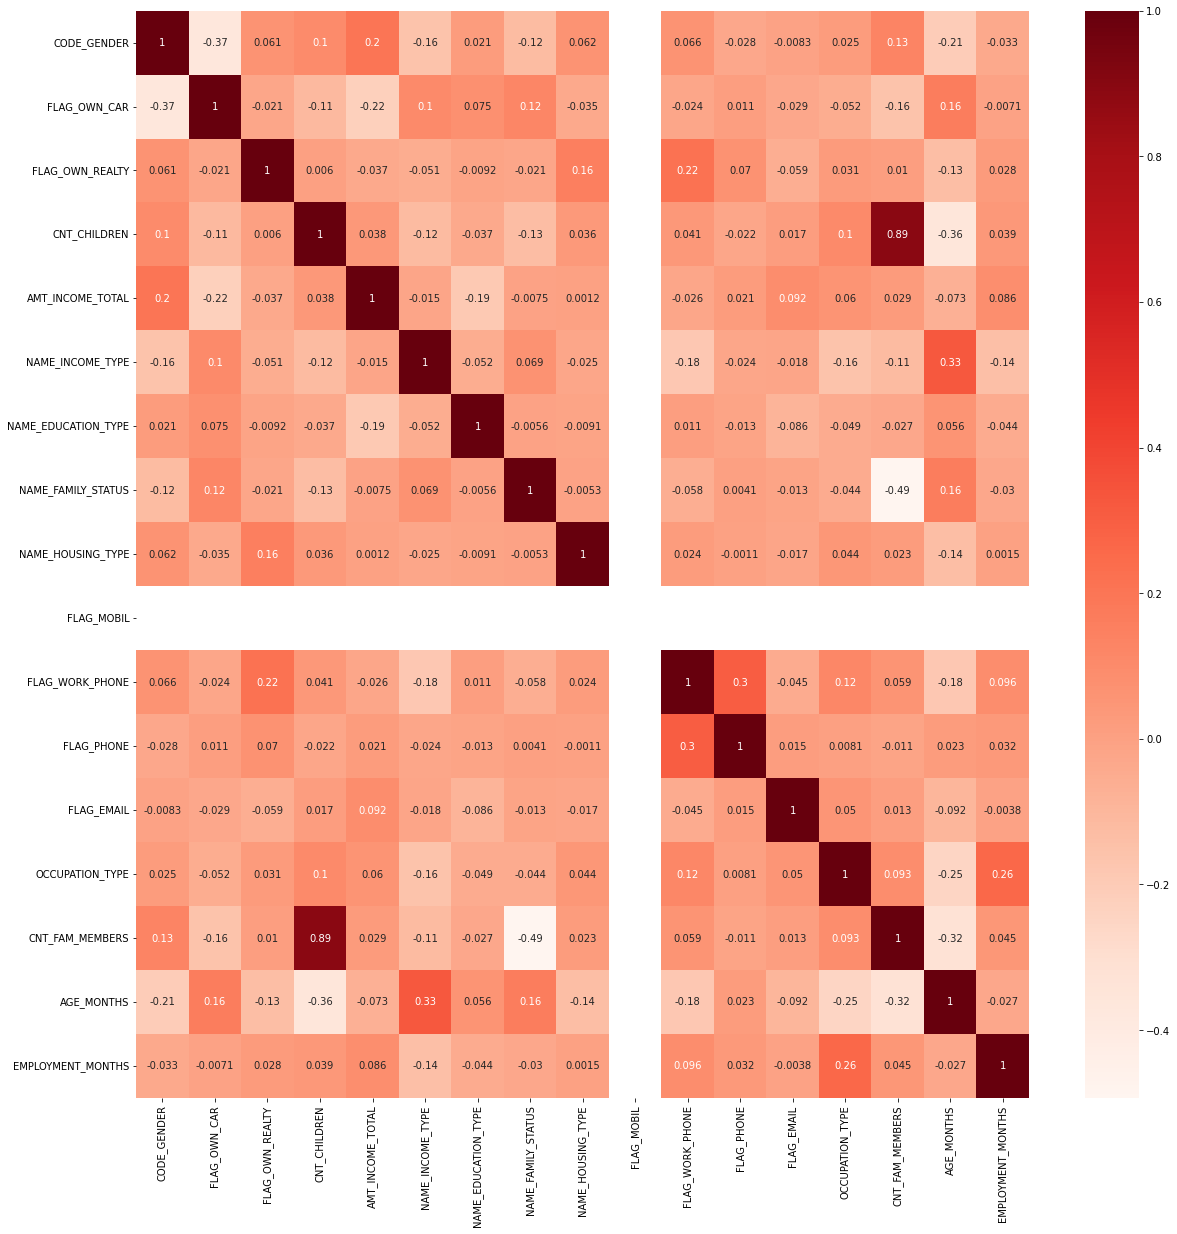

In [54]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
df = application.drop(["ID", "REP"], axis=1)
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [55]:
# Drop columns that have high correlation
application = application.drop(["ID", "FLAG_MOBIL", "CNT_FAM_MEMBERS"],axis=1)

In [56]:
application 

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REP,AGE_MONTHS,EMPLOYMENT_MONTHS
0,1,0,0,0,427500.0,0,0,0,0,1,0,0,0,1,379,134
1,1,0,0,0,427500.0,0,0,0,0,1,0,0,0,1,380,135
2,1,0,0,0,112500.0,0,1,1,1,0,0,0,1,1,676,8
3,0,1,0,0,270000.0,1,1,2,1,0,1,1,2,1,601,74
4,0,1,0,0,270000.0,1,1,2,1,0,1,1,2,1,589,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,1,0,0,0,90000.0,0,1,1,1,0,0,0,0,1,606,35
23415,0,0,0,0,130500.0,0,1,1,1,0,1,0,4,1,511,289
23416,0,1,0,0,157500.0,1,0,1,1,0,1,1,13,0,384,20
23417,0,1,0,0,157500.0,2,0,1,1,0,1,1,13,0,374,11


In [57]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23419 entries, 0 to 23418
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          23419 non-null  int64  
 1   FLAG_OWN_CAR         23419 non-null  int64  
 2   FLAG_OWN_REALTY      23419 non-null  int64  
 3   CNT_CHILDREN         23419 non-null  int64  
 4   AMT_INCOME_TOTAL     23419 non-null  float64
 5   NAME_INCOME_TYPE     23419 non-null  int64  
 6   NAME_EDUCATION_TYPE  23419 non-null  int64  
 7   NAME_FAMILY_STATUS   23419 non-null  int64  
 8   NAME_HOUSING_TYPE    23419 non-null  int64  
 9   FLAG_WORK_PHONE      23419 non-null  int64  
 10  FLAG_PHONE           23419 non-null  int64  
 11  FLAG_EMAIL           23419 non-null  int64  
 12  OCCUPATION_TYPE      23419 non-null  int64  
 13  REP                  23419 non-null  int64  
 14  AGE_MONTHS           23419 non-null  int32  
 15  EMPLOYMENT_MONTHS    23419 non-null 

In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb

training, testing = train_test_split(application, test_size=0.2)

In [59]:
training['REP'].value_counts()

1    18215
0      520
Name: REP, dtype: int64

In [60]:
# Oversampling to balance the data

ros = RandomOverSampler(random_state=42)

X_ros, y_ros = ros.fit_resample(training.drop(['REP'], axis=1), training['REP'])

oversampled = pd.concat([X_ros, y_ros],axis=1)

y_ros.value_counts()

1    18215
0    18215
Name: REP, dtype: int64

In [81]:
x_train = oversampled.drop(['REP'], axis=1)
y_train = oversampled['REP']

x_test = testing.drop(['REP'], axis=1)
y_test = testing['REP']

In [82]:
xgb_cf = xgb.XGBClassifier()
xgb_cf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

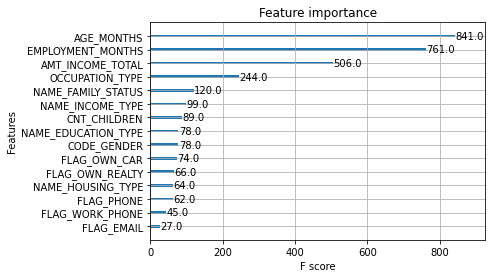

In [83]:
# Plot feature importance

xgb.plot_importance(xgb_cf)

<AxesSubplot:>

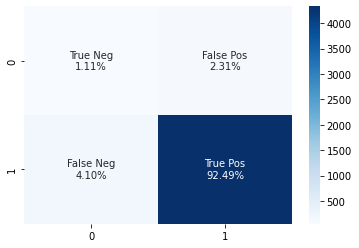

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

pred_class = xgb_cf.predict(x_test)
cnf_matrix_dev = confusion_matrix(y_test, pred_class)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_dev.flatten()/np.sum(cnf_matrix_dev)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix_dev, annot=labels, fmt="", cmap='Blues')
# sns.heatmap(cnf_matrix_dev/np.sum(cnf_matrix_dev), annot=True, 
#             fmt='.2%', cmap='Blues')

In [ ]:
accuracy = accuracy_score(pred_class, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(pred_class, y_test)
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 93.60%
Precision: 95.76%


In [ ]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(xgb_cf, x_train, y_train, cv=5)
print(f"Accuracy: {(results.mean()*100):.2f}")

Accuracy: 97.12
